## Summary
This dataset (ml-20m) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

# details
Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
The data are contained in six files, genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.  This and other GroupLens data sets are publicly available for download at http://grouplens.org/datasets/.

CITATION:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872


# FILES
README.txt
ml-20m.zip (size: 190 MB, checksum)
Also see the MovieLens 20M YouTube Trailers Dataset for links between MovieLens movies and movie trailers hosted on YouTube.


In [1]:
%matplotlib inline

import os
from pprint import pprint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 10)


DATAPATH = '/Users/ergonyc/Projects/Insight/Data'
DATA_DIR = DATAPATH + '/ml-20m'
MOVIE_CSV_FILE = os.path.join(DATA_DIR, 'movies.csv')
RATINGS_CSV_FILE = os.path.join(DATA_DIR, 'ratings.csv')
TAGS_CSV_FILE = os.path.join(DATA_DIR, 'tags.csv')
LINKS_CSV_FILE = os.path.join(DATA_DIR, 'links.csv')



In [2]:
# Load movies data.
movies = pd.read_csv(MOVIE_CSV_FILE, sep=',')

# Clear the field genres
#movies['genres'] = np.where(movies['genres'] == '(no genres listed)', '', movies['genres'])
movies.head(5)



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv(RATINGS_CSV_FILE, sep=',')
# ratings['datetime'] = ratings['timestamp'].apply(pd.to_datetime, unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [15]:
#ratings.timestamp.to_datetime(unit='s')
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


# lets look at 

## 1 - the distribution of ratings.
## 2 - some statistics of how many movies each person rates
## 3 - some statistics for variation of the most reviewed "high" "med" and "low" rated movies.



In [17]:
#First Ratings:
    
ratings.rating.describe()

ratings.rating.unique

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Looks celar that ratings are clearly on a 0 to 5 scale based on min and max, but the distribution must skew towards higher ratings, since the average is 3.5 and the min is 0.5.  Only a quarter of ratings are below 3!! 


Lets plot the distrubiton of ALL ratings.


/Users/ergonyc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Users/ergonyc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: negative dimensions are not allowed

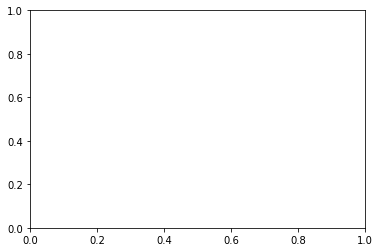

In [27]:

np.linspace(0,5,.1)
plt.hist(ratings.rating, density=True, color='blue', bins=np.linspace(0, 5, .1), alpha=.5) 
#plt.hist(y, density=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Randoam Values')

plt.show()

np.arrang


In [24]:
movies['year']= (( movies.title.str.extract(r'\((....)\) *$') )[0].astype('float32'))
movies.describe()

,movieId,year
count,27278.000000,27255.000000
mean,59855.480570,1989.365601
std,44429.314697,23.336266
min,1.000000,1891.000000
25%,6931.250000,1976.000000
50%,68068.000000,1998.000000
75%,100293.250000,2008.000000
max,131262.000000,2015.000000


In [25]:

# Load "tag" data
tags = pd.read_csv(TAGS_CSV_FILE, sep=',')
# convert time to dates
#tags['datetime'] = tags['timestamp'].apply(pd.to_datetime, unit='s')
#tags.timestamp.to_datetime(unit='s')
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


## tags.csv: Tags Data File Structure

All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

    userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Count of userId

In [16]:
print(np.unique(ratings['userId']).shape[0])

138493


Count of movieId

In [6]:
print(np.unique(ratings['movieId']).shape[0])

26744


Count of userId

In [5]:
print(np.unique(ratings['userId']).shape[0])

138493


Count of movieId

In [6]:
print(np.unique(df_ratings['movieId']).shape[0])

26744


For completness we loaded the "links" and "tags" from .csv.  However, we will not analyzed for now.

#1 GENRES

#2 PRODUCTION DATES

#3 Summarize

In [9]:
#load links to other movie databases
links = pd.read_csv(LINKS_CSV_FILE, sep=',')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
movies.describe()

#links.describe()

# Get genres list
#def get_genres(s):
 #   if len(s) == 0:
 #       return np.NaN
#        return s.split('|')

#genres_list = movies['genres'].apply(get_genres).dropna()
#genres = list(set().union(*list(genres_list)))
#print(genres)

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [ ]:
#import re
#def get_year(s):
#    pattern = re.compile('^(.*) \\(([0-9\-]*)\\)$')
#    result = pattern.match(s)
#    if result:
#        return int(result.group(2).split('-')[0])
#    else:
#        return np.NaN
#movies['year'] = movies['title'].apply(get_year)
#movies.head()

In [ ]:




# Generate 1000 random values.
x = np.random.normal(10, 5, 1000)
y = np.random.normal(11,10,1000)
# Plot them as a histogram.
plt.hist(x) 
plt.show()# Same data, this time normed, using density.
plt.hist(x, density=True, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, density=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Random Values')

plt.show()
